<a href="https://colab.research.google.com/github/shahriarivari/Diabete_RL/blob/main/cbl_neuralnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

Importing Data

In [2]:
# Read the Excel file
df = pd.read_excel('Summer99loaddata.xlsx')

In [ ]:
df.shape

(51, 22)

In [ ]:
df.columns

Int64Index([  8,   9,  10,  11,  18,  19,  20,  21,  22,  23, 121, 131, 141,
            151, 161, 171,  12,  13,  14,  15,  16,  17],
           dtype='int64')

#Pytorch Neural Network model

In [3]:
# Standard PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

##Data Preparation

In [4]:
# Calculate mean and standard deviation for the entire DataFrame
df_mean = df.stack().mean()
df_std = df.stack().std()

# Standardize the DataFrame
normalized_df = (df - df_mean) / df_std

##Splitting and converting data into torch tensors

In [5]:
# convert the data to a PyTorch tensor
X = torch.tensor(normalized_df.drop(columns=[12,  13,  14,  15,  16,  17],axis =1).astype('float32').values, dtype=torch.float32)
y = torch.tensor(normalized_df[[12,  13,  14,  15,  16,  17]].astype('float32').values, dtype=torch.float32)

In [6]:
X_train, temp_data, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)
# Split the temp_data into evaluation and test sets
X_eval, X_test, y_eval, y_test = train_test_split(temp_data, y_temp, test_size=0.5, random_state=42)

# Convert training data to PyTorch DataLoader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=4, shuffle=True)

In [7]:
X_train.shape, X_eval.shape, X_test.shape

(torch.Size([45, 16]), torch.Size([3, 16]), torch.Size([3, 16]))

In [8]:
y_train.shape , y_eval.shape , y_test.shape

(torch.Size([45, 6]), torch.Size([3, 6]), torch.Size([3, 6]))

##Constructing the model

In [9]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size:int, output_size:int, num_hidden_units:int, num_layers:int):
    super().__init__()
    layers = []
    layers.append(nn.Linear(input_size, num_hidden_units))
    layers.append(nn.ReLU())
    for _ in range(num_layers - 1):
        layers.append(nn.Linear(num_hidden_units, num_hidden_units))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(p=0.1))
    layers.append(nn.Linear(num_hidden_units, output_size))
    self.model = nn.Sequential(*layers)

  def forward(self, x):
    return self.model(x)

##Making a grid
Making a grid to train multiple networks

In [10]:
param_grid = {
    'num_hidden_units': [8, 16, 32, 64],
    'num_layers': [2, 3, 4, 5],
    'learning_rate': [0.001, 0.01, 0.1]
}

In [11]:
from train_functions import train_step, test_step, train

# for loop to search the parameter space for the best parameters
# Convert test data to PyTorch tensor
eval_data = (X_eval, y_eval)
test_data = (X_test, y_test)
counter = 1
models_results_list = []

for params in ParameterGrid(param_grid):
  print(f"{counter} set of params in total of {len(ParameterGrid(param_grid))}")

  model_parameters = params.copy()  # Create a copy of params to avoid modifying the original dictionary
  learning_rate = params['learning_rate']
  del params['learning_rate']  # Remove learning_rate from params

  model = NeuralNetwork(input_size=X.shape[1],output_size = y.shape[1], **params).to(device)
  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  # train the model
  results = train(model=model,
                  train_dataloader = train_loader,
                  test_data = eval_data,
                  optimizer = optimizer,
                  criterion = criterion,
                  epochs = 150,
                  device = device)

  # now test the model on test data
  test_loss = test_step(model=model,
                        test_data = test_data,
                        criterion = criterion,
                        device = device)

  model_results = {
    "model_parameters": model_parameters,
    "train_loss": results["train_loss"],
    "eval_loss": results["test_loss"],
    "test_loss": test_loss
  }
  models_results_list.append(model_results)

  counter +=1

1 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

2 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

3 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

4 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

5 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

6 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

7 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

8 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

9 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

10 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

11 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

12 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

13 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

14 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

15 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

16 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

17 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

18 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

19 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

20 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

21 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

22 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

23 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

24 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

25 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

26 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

27 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

28 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

29 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

30 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

31 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

32 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

33 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

34 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

35 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

36 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

37 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

38 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

39 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

40 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

41 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

42 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

43 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

44 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

45 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

46 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

47 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

48 set of params in total of 48


  0%|          | 0/150 [00:00<?, ?it/s]

In [45]:
# find the best model that didnt overfit
# Lists to store indices of models that didn't overfit
non_overfitting_model_indices = []

# Iterate through models_results_list
for i, model_results in enumerate(models_results_list):
  model_parameters = model_results["model_parameters"]
  train_loss = model_results["train_loss"]
  eval_loss = model_results["eval_loss"]

  # Check if eval loss is less than or equal to train loss at the last epoch
  if eval_loss[-50:] > train_loss[-50:]:
    non_overfitting_model_indices.append(i)

# Compare test losses for non-overfitting models
test_losses = [models_results_list[i]["test_loss"] for i in non_overfitting_model_indices]
# Select the best model index with the lowest test losses
best_model_index = sorted(range(len(test_losses)), key=lambda k: test_losses[k])[0]
print(models_results_list[best_model_index]["model_parameters"])

{'learning_rate': 0.001, 'num_hidden_units': 8, 'num_layers': 2}


In [46]:
models_results_list[best_model_index]["eval_loss"][-10:] > models_results_list[best_model_index]["train_loss"][-10:]

False

In [34]:
models_results_list[best_model_index]["eval_loss"][-1] > models_results_list[best_model_index]["train_loss"][-1]

False

In [47]:
models_results_list[best_model_index]["eval_loss"][-10:]

[0.01913769356906414,
 0.022504199296236038,
 0.022154133766889572,
 0.02409953810274601,
 0.024855896830558777,
 0.022282546386122704,
 0.021856313571333885,
 0.018584122881293297,
 0.019501889124512672,
 0.02022140845656395]

In [48]:
models_results_list[best_model_index]["train_loss"][-10:]

[0.03614353179000318,
 0.06910819187760353,
 0.04036242375150323,
 0.02309416397474706,
 0.06292105303145945,
 0.047638236079365015,
 0.03483042450776944,
 0.035606232685192175,
 0.05468740927365919,
 0.0699484075885266]

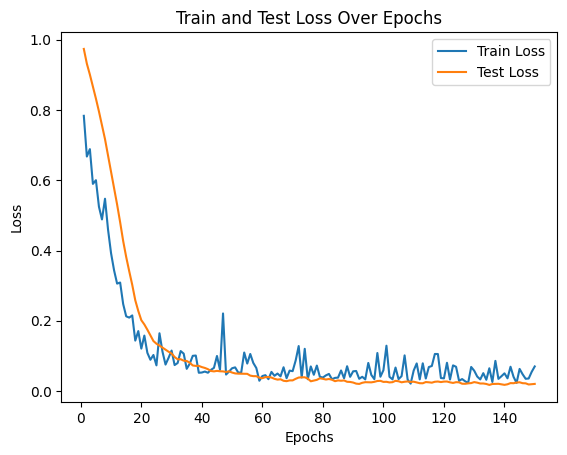

In [49]:
from train_functions import plot_perfomance_results
best_model_train_loss = models_results_list[best_model_index]['train_loss']
best_model_eval_loss = models_results_list[best_model_index]['eval_loss']
plot_perfomance_results({"train_loss":best_model_train_loss,
                         "test_loss":best_model_eval_loss})

##Making prediction using the best model

In [14]:
best_model_parameters = models_results_list[best_model_index].copy()  # Create a copy of params to avoid modifying the original dictionary
del best_model_parameters["model_parameters"]['learning_rate']  # Remove learning_rate from params
print(best_model_parameters["model_parameters"])

{'num_hidden_units': 32, 'num_layers': 2}


In [15]:
best_model = NeuralNetwork(input_size=X_test.shape[1],output_size = y_test.shape[1], **best_model_parameters["model_parameters"]).to(device)
# prediction on X_test
prediction = (best_model(X_test.to(device)).detach().cpu().numpy())
actual_values = y_test.detach().cpu().numpy()
# de-normalize
denormalize_prediction = (prediction*df_std) + df_mean
denormalize_actual_values = (actual_values*df_std) + df_mean


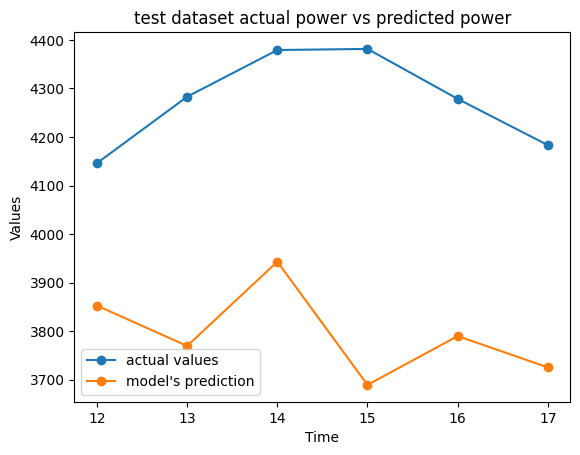

In [16]:
# plot the best model's prediction vs the actual values
import matplotlib.pyplot as plt
plt.figure()
# Plotting actual values against Time
plt.plot([12,13,14,15,16,17],denormalize_actual_values[2], marker='o', linestyle='-', label = "actual values")
# Plotting predictions against Time
plt.plot([12,13,14,15,16,17],denormalize_prediction[2], marker='o', linestyle='-', label = "model's prediction")

plt.title('test dataset actual power vs predicted power')
plt.xlabel('Time')
plt.ylabel('Values')
# Adding a legend
plt.legend()
# Show the plot
plt.show()

ANN Model

In [ ]:
np.random.seed(42)
keras.utils.set_random_seed(42)
tf.random.set_seed(42)
# Create a sequential model
model = keras.models.Sequential()

# Add input layer with 10 units
model.add(keras.layers.Dense(units=16, input_shape=(16,)))

# Add a hidden layer with 8 units
model.add(keras.layers.Dense(units=32, activation='relu'))

# Add output layer with 6 units
model.add(keras.layers.Dense(units=6))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
X_train = df.iloc[:45,0:16]
y_train = df.iloc[:45,16:22]

In [ ]:
# Train the model

model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 21703534.0000
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 16603849.0000
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 12557220.0000
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 9652996.0000
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 7319046.5000
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 5323825.0000
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 3672797.2500
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 2338705.0000
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 1360627.5000
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 701367.4375
Epoch 11/100
6/6 [==============================] - 0s 3ms/step - loss: 288261.0312
Epoch 12/100
6/6 [==============================] - 0s 2ms/step - loss: 1

In [ ]:
X_test = df.iloc[45:47,0:16]

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

print(predictions)

1/1 [==============================] - 0s 98ms/step
[[3491.057  3646.9707 3607.6213 3606.9902 3625.5862 3649.0688]
 [3313.3015 3446.4258 3428.1716 3486.56   3419.942  3419.179 ]]


Plotting

             12           13           14           15           16  \
45  3372.672993  3487.282749  3561.856572  3589.058404  3551.764157   
46  3197.774487  3304.392105  3370.835244  3387.047030  3342.278824   

             17  
45  3507.620934  
46  3296.836579  
614.4155649843747


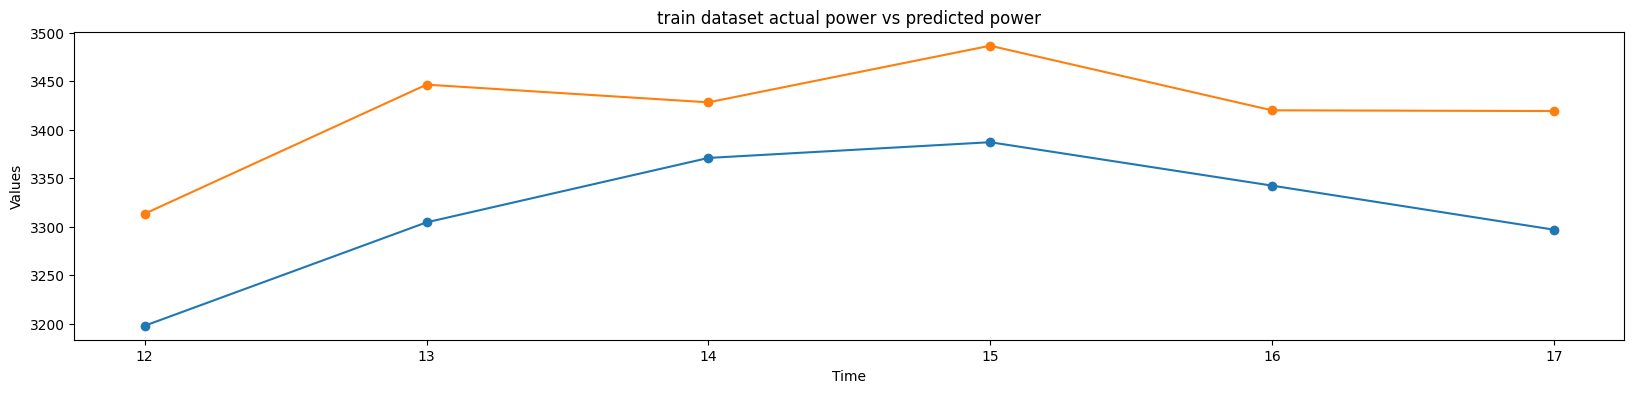

In [ ]:
import matplotlib.pyplot as plt
day = 1
plt.figure(figsize=(20, 4))
y_test = df.iloc[45:47,16:22]
print(y_test)

plt.plot(y_test.iloc[day], marker='o', linestyle='-')

# Plotting predictions against Time
plt.plot([12,13,14,15,16,17],predictions[day,:], marker='o', linestyle='-')

plt.title('train dataset actual power vs predicted power')
plt.xlabel('Time')
plt.ylabel('Values')

error = predictions[day,:] -  y_test.iloc[day]
print(sum(abs(error)))


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming you have your input and output vectors as numpy arrays
X = X_train  # Input data, shape: (100, 10)
y = y_train   # Output data, shape: (100, 6)

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100,random_state=42)

# Train the model
rf.fit(X, y)

# Make predictions on new data
new_data = X_test  # New input data, shape: (1, 10)
predictions = rf.predict(new_data)  # Predicted output, shape: (1, 6)
print(predictions)

In [ ]:
import matplotlib.pyplot as plt
day = 1
plt.figure(figsize=(20, 4))
y_test = df.iloc[45:47,16:22]
print(y_test)

plt.plot(y_test.iloc[day], marker='o', linestyle='-')

# Plotting predictions against Time
plt.plot([12,13,14,15,16,17],predictions[day,:], marker='o', linestyle='-')

plt.title('train dataset actual power vs predicted power')
plt.xlabel('Time')
plt.ylabel('Values')

error = predictions[day,:] -  y_test.iloc[day]
print(sum(abs(error)))

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X_train = df.iloc[:45,0:16]
y_train = df.iloc[:45,16:22]
X_test = df.iloc[45:47,0:16]
y_test = df.iloc[45:47,16:22]


# Create a Gradient Boosting Regressor object
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
print(X_train)